This colab aims at creating a CNN to classify pothole images using about 947 positive images and 352 negative images.

In [4]:
# Retrieve Dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing the necessary packages....

In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import pathlib

The next few cells is aimed at creating labels for each image in the dataset.
Each image has been put into one of two folders 'pothole' and 'normal'. We then use the ImageDataGenerator class to add labels to this images.

In [5]:
normal_path = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/normal'
pothole_path = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/potholes'

In [6]:
print(len(os.listdir(normal_path)))

352


In [29]:
data_dir = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset'
data_dir = pathlib.Path(data_dir)

In [30]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1299

In [7]:
class_names = ['potholes', 'normal']

In [8]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [10]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
# STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [34]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = class_names)

Found 1299 images belonging to 2 classes.


In [35]:
CLASS_NAMES = np.array(class_names)

In [36]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

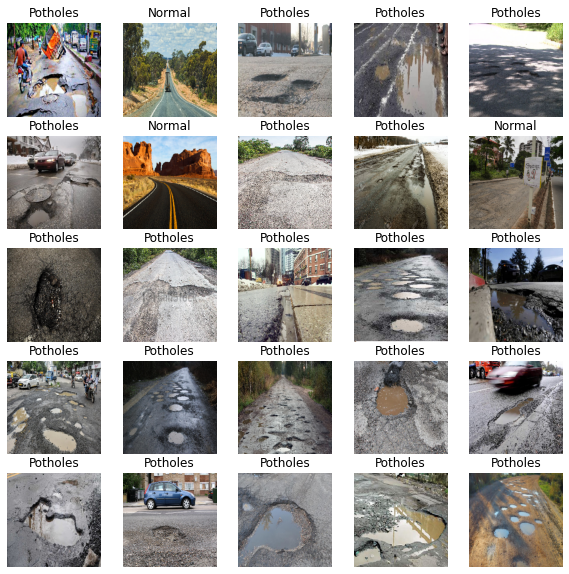

In [37]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

Before creating the CNN, I'll split the data into training and validation subsets in the ratio 80:20

In [40]:
# create the folders
os.makedirs(r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/train')
os.makedirs(r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/val')
os.makedirs(r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/train/potholes')
os.makedirs(r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/train/normal')
os.makedirs(r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/val/potholes')
os.makedirs(r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/val/normal')

In [11]:
import math
val_normals = math.floor(0.2 * len(os.listdir(normal_path)))
val_normals

70

In [44]:
# Create 70 random images index to be copied to normal val folder
import random
random_indexes = []
i = 0
while i < val_normals:
    index = random.randint(0, len(os.listdir(normal_path)) - 1)
    if index in random_indexes:
        index = random.randint(0, len(os.listdir(normal_path))- 1)
    else:
        random_indexes.append(index)
        i += 1

print(len(random_indexes))

70


In [13]:
train_pothole_path = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/train/potholes'
train_normal_path = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/train/normal'
val_pothole_path = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/val/potholes'
val_normal_path = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/val/normal'

In [50]:
len(os.listdir(val_normal_path))

70

In [49]:
for j in random_indexes:
  file_name = os.listdir(normal_path)[j]
  shutil.copy(os.path.join(normal_path, file_name), os.path.join(val_normal_path, file_name))

In [51]:
val_potholes = math.floor(0.2 * len(os.listdir(pothole_path)))
val_potholes

189

In [52]:
# Create 189 random images index to be copied to normal val folder
import random
random_indexes = []
i = 0
while i < val_potholes:
    index = random.randint(0, len(os.listdir(pothole_path)) - 1)
    if index in random_indexes:
        index = random.randint(0, len(os.listdir(pothole_path))- 1)
    else:
        random_indexes.append(index)
        i += 1

print(len(random_indexes))

189


In [55]:
for j in random_indexes:
   file_name = os.listdir(pothole_path)[j]
   shutil.copy(os.path.join(pothole_path, file_name), os.path.join(val_pothole_path, file_name))

In [56]:
len(os.listdir(val_pothole_path))

189

In [61]:
def copy_train(dir, next_dir,dst_dir):
  for file_ in os.listdir(dir):
    if file_ not in os.listdir(next_dir):
      shutil.copy(os.path.join(dir, file_), os.path.join(dst_dir, file_))

In [63]:
copy_train(normal_path, val_normal_path, train_normal_path)

In [64]:
len(os.listdir(train_normal_path))

282

In [65]:
copy_train(pothole_path, val_pothole_path, train_pothole_path)

In [14]:
len(os.listdir(train_pothole_path))

758

In [15]:
train_dir = r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/train'
train_data_gen = image_generator.flow_from_directory(directory=train_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

Found 1040 images belonging to 2 classes.


In [16]:
val_dir =  r'/content/drive/My Drive/Colab Notebooks/Pothole Dataset/val'
val_data_gen = image_generator.flow_from_directory(directory=val_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

Found 259 images belonging to 2 classes.


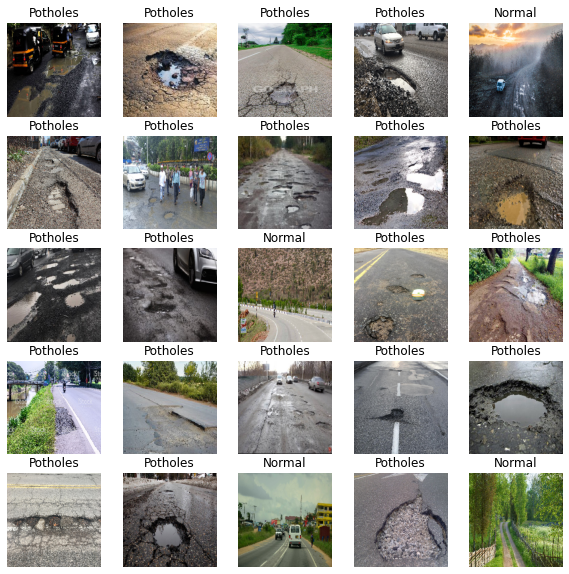

In [90]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

After preparing the training set and the data set, the next step is to create a CNN with transfer learning

In [17]:
import tensorflow_hub as hub

In [18]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

In [19]:
feature_extractor.trainable = False

In [20]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [22]:
train_directory = pathlib.Path(train_dir)
no_of_training_images = len(list(train_directory.glob('*/*.jpg')))
no_of_training_images

1040

In [23]:
val_directory = pathlib.Path(val_dir)
no_of_val_images = len(list(val_directory.glob('*/*.jpg')))
no_of_val_images

259

In [96]:
label_batch.shape

(32, 2)

In [24]:

EPOCHS = 6

history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(no_of_training_images/float(BATCH_SIZE))),
                              epochs=EPOCHS,
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(no_of_val_images/float(BATCH_SIZE)))
                              )

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/6
33/33 [==============================] - 620s 19s/step - loss: 0.4605 - accuracy: 0.8462 - val_loss: 0.3818 - val_accuracy: 0.9459
Epoch 2/6
33/33 [==============================] - 27s 819ms/step - loss: 0.3682 - accuracy: 0.9529 - val_loss: 0.3533 - val_accuracy: 0.9730
Epoch 3/6
33/33 [==============================] - 27s 820ms/step - loss: 0.3538 - accuracy: 0.9654 - val_loss: 0.3440 - val_accuracy: 0.9807
Epoch 4/6
33/33 [==============================] - 27s 825ms/step - loss: 0.3462 - accuracy: 0.9788 - val_loss: 0.3403 - val_accuracy: 0.9807
Epoch 5/6
33/33 [==============================] - 27s 817ms/step - loss: 0.3420 - accuracy: 0.9827 - val_loss: 0.3403 - val_accuracy: 0.9807
Epoch 6/6
33/33 [==============================] - 28s 860ms/step - loss: 0.3392 - accuracy: 0.9827 - val_loss: 0.3342 - val_accuracy: 0.9846


In [25]:
import numpy as np
import PIL.Image as Image

In [77]:
pothole_img = r'/content/drive/My Drive/Colab Notebooks/test images/smooth_road1jpg.jpg'

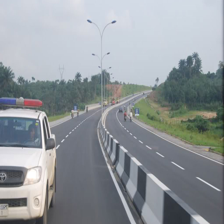

In [78]:
img = Image.open(pothole_img).resize((224, 224))
img

In [79]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [80]:
result = model.predict(img[np.newaxis, ...])

In [70]:
result.shape

(1, 2)

In [81]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

0

In [82]:
result

array([[0.99871385, 0.00128614]], dtype=float32)

In [53]:
class_names = [f for f in train_data_gen.class_indices.keys()]


In [44]:
number_of_examples = len(train_data_gen.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(train_data_gen[i][1]))

In [54]:
class_names

['normal', 'potholes']

In [73]:
confidence_level = result * 100
confidence_level

array([[28.880516, 71.119484]], dtype=float32)

In [57]:
np.set_printoptions(suppress=True)


array([[ 0.02281714, 99.97719   ]], dtype=float32)

In [74]:
print('confidence level: ', str(confidence_level[0][predicted_class]), '%')

confidence level:  71.119484 %


The next step is to save the model for reuse

In [83]:
tf.saved_model.save(model, 'Pothole Detection Model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: Pothole Detection Model/assets


INFO:tensorflow:Assets written to: Pothole Detection Model/assets


In [84]:
reloaded_model = tf.keras.models.load_model(
  'Pothole Detection Model',
  custom_objects={'KerasLayer': hub.KerasLayer})

reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [85]:
new_result = reloaded_model.predict(img[np.newaxis, ...])

In [86]:
new_result.shape

(1, 2)

In [87]:
predicted_class = np.argmax(new_result[0], axis=-1)
predicted_class

0

In [88]:
confidence_level = new_result * 100
confidence_level

array([[99.87138   ,  0.12861405]], dtype=float32)

In [99]:
shutil.make_archive("Pothole Model.zip", 'zip', '/content/Pothole Detection Model')

ValueError: ignored

In [96]:
os.getcwd()

'/content'